<a href="https://colab.research.google.com/github/Taciana3090/FAST-MachineLearning/blob/Taciana3090%2Fmaster/Taciana_Vasconcelos_projeto_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import missingno as msno
sns.set()
import matplotlib


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [ ]:
# Carregando a base de dados
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn")
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Padronização dos nomes
orig_cols = list(df.columns) 
new_cols = [] 
for col in orig_cols:     
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower()) 

df.columns = new_cols

###2. Análise exploratória
Faça uma exploração dos dados do dataset, procurando verificar:

In [ ]:
df.shape

(2938, 22)

a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

In [ ]:
df.info()

# A maioria das variáveis possuem o type float;
# Existem variáveis com valores nulos;
# O database possue duas variáveis categóricas, são elas: status e country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [ ]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.tail()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


b) as informações estatísticas básicas das colunas do dataset;

In [ ]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


c) se há dados faltantes e decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas as colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


In [ ]:
# Soma dos dados faltantes por coluna com descrição
a = list(df.columns)
b = []
for i in a:
    c = df[i].isnull().sum()
    b.append(c)
null_df = pd.DataFrame({'Feature name' :a, 'no. of nan' :b})
null_df

,Feature name,no. of nan
0,country,0
1,year,0
2,status,0
3,life_expectancy,10
4,adult_mortality,10
5,infant_deaths,0
6,alcohol,194
7,percentage_expenditure,0
8,hepatitis_b,553
9,measles,0


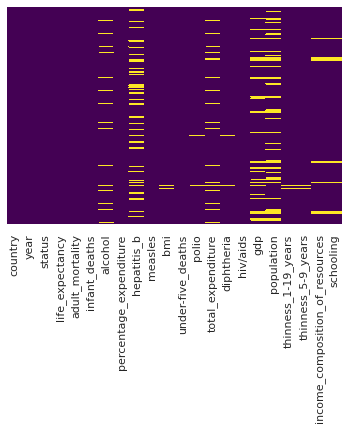

In [ ]:
# Plot of Concentration
_= sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [ ]:
df.drop(['year', 'country', 'gdp', 'population',  'infant_deaths', 'hepatitis_b'], axis=1, inplace=True)

In [ ]:
status = pd.get_dummies(df['status'])
df = pd.concat([df, status], axis=1)
df.drop(['status', 'Developed'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   life_expectancy                  2556 non-null   float64
 1   adult_mortality                  2556 non-null   float64
 2   alcohol                          2556 non-null   float64
 3   percentage_expenditure           2556 non-null   float64
 4   measles                          2556 non-null   int64  
 5   bmi                              2556 non-null   float64
 6   under-five_deaths                2556 non-null   int64  
 7   polio                            2556 non-null   float64
 8   total_expenditure                2556 non-null   float64
 9   diphtheria                       2556 non-null   float64
 10  hiv/aids                         2556 non-null   float64
 11  thinness_1-19_years              2556 non-null   float64
 12  thinness_5-9_years  

d) a matriz de correlação das entradas com a saída;

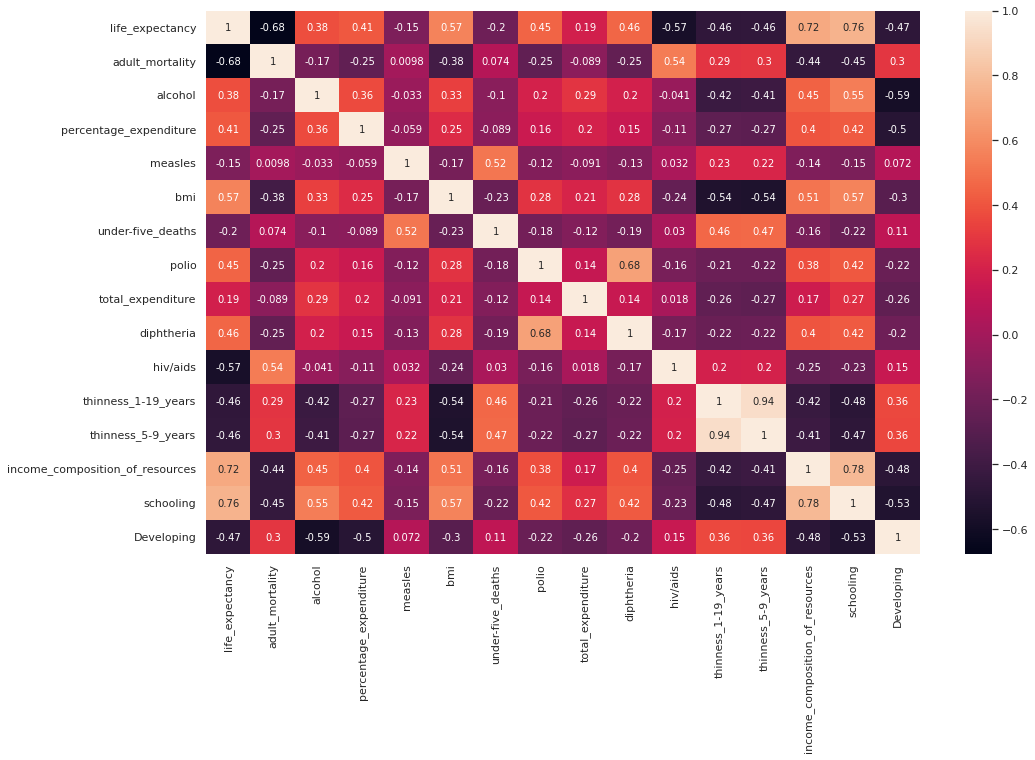

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(16, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

e) quais as features que mais possuem correlação (negativa ou positivamente) com a saída?

In [ ]:
# Positivamente: schooling e income_composition_of_resources são as variáveis que possuem mais correlação com a saída.
# Negativamente: adult_mortality e hiv/aids são as variáveis que possuem mais correlação com a saída.       

f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

In [ ]:
# as features thinness_1-19_years e thinness_5-9_years são redundantes com coleção de 0.94.

g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

In [ ]:
# Dentre as features thinness_1-19_years e thinness_5-9_years eu removeria a primeira, pois ela já abrange todo o espaço da segunda feature.

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

In [ ]:
# Sim. 

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [ ]:
df.columns

Index(['life_expectancy', 'adult_mortality', 'alcohol',
       'percentage_expenditure', 'measles', 'bmi', 'under-five_deaths',
       'polio', 'total_expenditure', 'diphtheria', 'hiv/aids',
       'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling', 'Developing'],
      dtype='object')

In [ ]:
# Definição das colunas que serão features
features = ['schooling', 'income_composition_of_resources', 'bmi', 'adult_mortality', 'hiv/aids', 'thinness_5-9_years', 'thinness_1-19_years']

# Definição da variável-alvo
target = ['life_expectancy']

x = df[features]
y = df[target]

# Divisão do conjunto em treinamento e validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=tamanho_val, shuffle=True, random_state=0)

###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [ ]:
fi = StandardScaler()
X = fi.fit_transform(X_train[features])
X_test = fi.transform(X_val[features])

###5. Execute a Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_train, y_train)


# Predição no conjunto de validação
preditions_val = model.predict(X_val)

result = abs(y_val - preditions_val)
result.mean()

life_expectancy    3.01146
dtype: float64

###6. Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

#### 6.1 Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

In [ ]:
y_val.head()

,life_expectancy
658,79.0
615,59.4
1819,67.5
293,67.9
1305,74.5


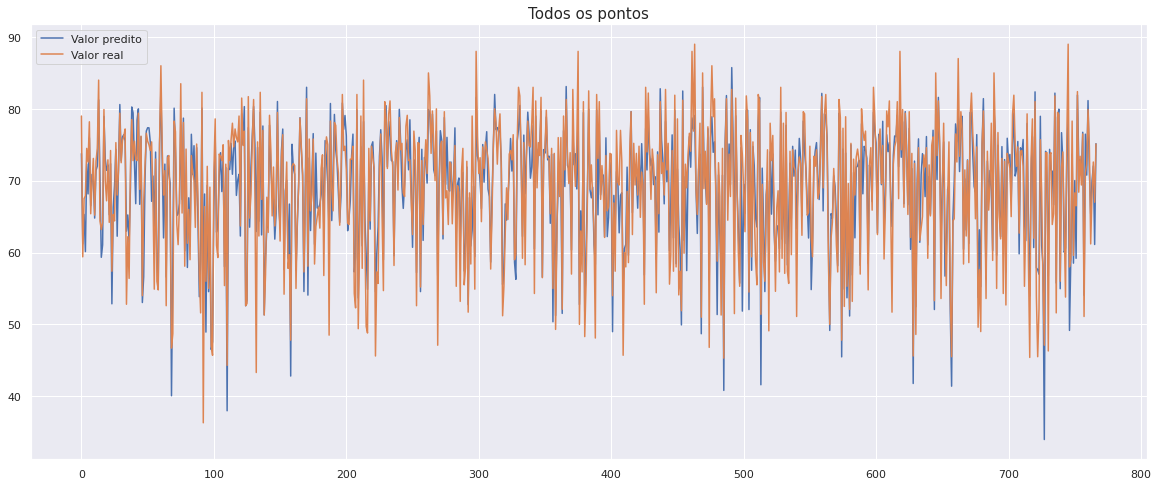

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(preditions_val, label='Valor predito')
plt.plot(y_val.to_numpy(), label='Valor real')
plt.title('Todos os pontos', fontsize=15)
plt.legend()
plt.show()

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

In [ ]:
preditions_val_100 = preditions_val[:100]
y_val_100 = y_val.to_numpy()[:100]
print('Tamanho preditions_val_100:',len(preditions_val_100))
print('Tamanho y_val_100:',len(y_val_100))

Tamanho preditions_val_100: 100
Tamanho y_val_100: 100


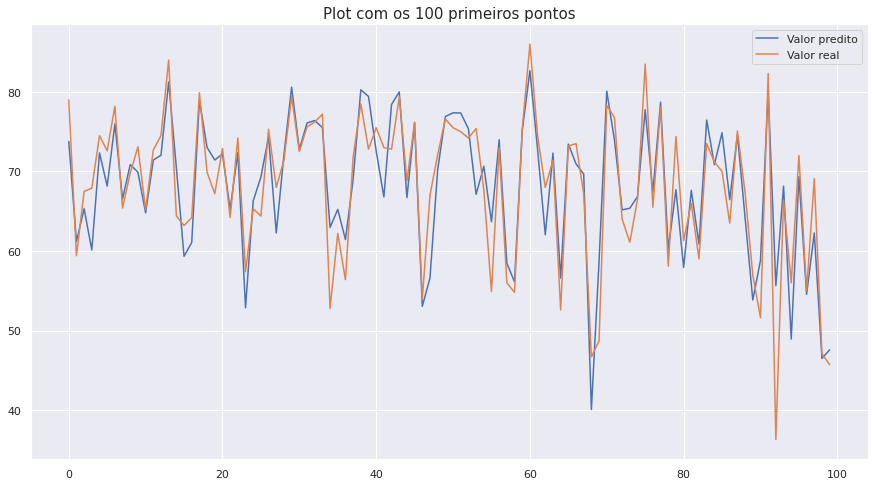

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(preditions_val_100, label='Valor predito')
plt.plot(y_val_100, label='Valor real')
plt.title('Plot com os 100 primeiros pontos', fontsize=15)
plt.legend()
plt.show()

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito).

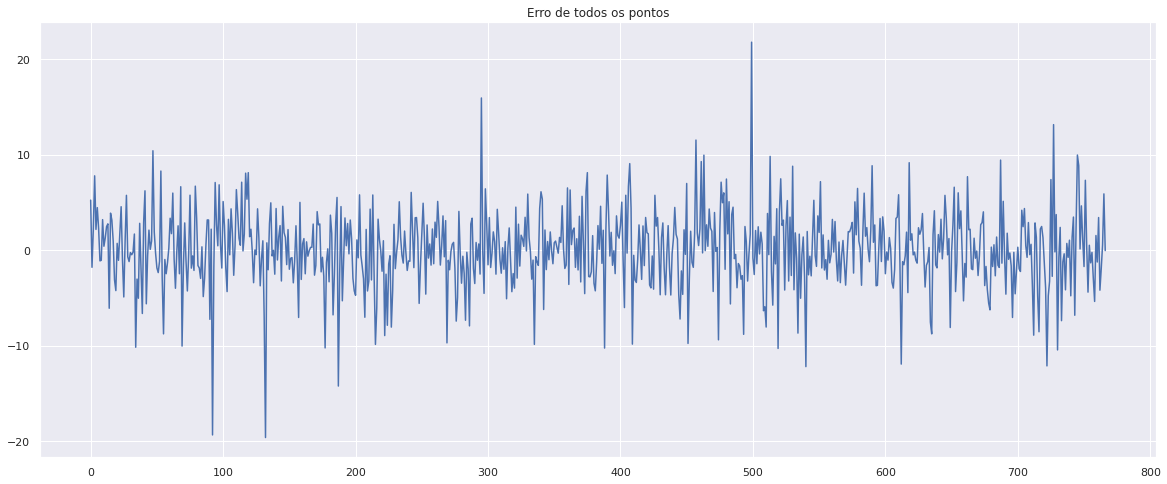

In [ ]:
erro = y_val.to_numpy() - preditions_val
plt.figure(figsize=(20,8))
plt.plot(erro)
plt.title('Erro de todos os pontos', fontsize=12)
plt.show()

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

In [ ]:
# Considero que sim, mas sei que posso melhorá-lo com mais tempo. 

####6.2 Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (RMSE e R2) e verifique se sua impressão visual se confirma.

In [ ]:
# Avaliação dos resultados
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
print('Variance score: %.2f' % r2_score(y_val, preditions_val))

RMSE: 4.068071222795353
Variance score: 0.82


In [ ]:
# O modelo obteve uma variance score de 0.82 - quanto mais perto de 1 melhor. - 
# E um RMSE de 4.06. - quanto menor o RMSE melhor vai ser. -
# As impressões apresentadas nos gráficos foram confirmadas pelas métrica documentadas.

####6.3 Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [ ]:
scores = cross_val_score(model, x, y, cv=10, scoring='r2')
scores

array([0.56022721, 0.81047611, 0.79460456, 0.79967618, 0.78479774,
       0.84253326, 0.81687845, 0.74130757, 0.74379954, 0.79409449])

In [ ]:
print(f'Média do R2: { score.mean():.3f}')

Média do R2: 0.799
